In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [2]:
!source activate python38

In [3]:
df=pd.read_pickle("../Data/Popularity_DF.pkl")

In [40]:
df.head()

,video_id,viewing_country,Total_Trend_Days,Video_Title,Publish_Time,PublishedAfter_in_Days,Origin_Country,Category,Tags,Duration,...,Video_Description,Blocked,Allowed,Channel_Title,Channel_Description,Channel_PublishedAt,Channel_Keywords,ChannelTopicCategories,GoogleAnalyticsUsed,IsmoderatingComments
0,--2K8l6BWfw,FR,1,La Relève #2 : Jessica Rodrigues,2018-03-05 13:37:34,1288,FR,Pets & Animals,"Jessica Rodrigues""|""jumping""|""horse""|""cheval""|...",261,...,Retrouve-nous sur ➼ http://www.georgettemag.co...,NaN,NaN,Georgette Mag,Retrouve-nous sur : http://georgettemag.com\n\...,2014-08-25 14:29:44,Cheval Poney Blog équitation,Pet | Lifestyle_(sociology) | Sport,False,False
1,--45ws7CEN0,CA,1,PlayStation E3 2018 Showcase | English,2018-06-12 03:11:18,4351,NaN,Gaming,"playstation|""playstation 4""|""playstation europ...",10948,...,Show starts at 1:13:20.E3 2018 has arrived. Jo...,NaN,NaN,PlayStation Europe,Welcome to the official PlayStation Europe You...,2006-07-13 16:14:28,"""playstation europe"" ""playstation eu"" ""playsta...",Video_game_culture | Role-playing_video_game |...,True,True
2,--45ws7CEN0,MX,1,PlayStation E3 2018 Showcase | English,2018-06-12 03:11:18,4351,NaN,Gaming,"playstation|""playstation 4""|""playstation europ...",10948,...,Show starts at 1:13:20.E3 2018 has arrived. Jo...,NaN,NaN,PlayStation Europe,Welcome to the official PlayStation Europe You...,2006-07-13 16:14:28,"""playstation europe"" ""playstation eu"" ""playsta...",Video_game_culture | Role-playing_video_game |...,True,True
3,--45ws7CEN0,RU,1,PlayStation E3 2018 Showcase | English,2018-06-12 03:11:18,4351,NaN,Gaming,"playstation|""playstation 4""|""playstation europ...",10948,...,Show starts at 1:13:20.E3 2018 has arrived. Jo...,NaN,NaN,PlayStation Europe,Welcome to the official PlayStation Europe You...,2006-07-13 16:14:28,"""playstation europe"" ""playstation eu"" ""playsta...",Video_game_culture | Role-playing_video_game |...,True,True
4,--728h8mnDY,FR,2,Rösti - YouCook,2017-12-05 16:30:00,616,FR,Howto & Style,"YouCook""|""cuisine""|""recette""|""europe de l'oues...",110,...,Les meilleures choses dans la vie sont les plu...,NaN,NaN,YouCook Cuisine,"La cuisine telle qu'on l'aime, facile et délic...",2016-03-29 16:11:59,"cuisine ""tuto cuisine"" recette recettes cuisin...",Lifestyle_(sociology) | Food,False,False


In [41]:
len(df["video_id"].unique())

124737

In [42]:
df.shape

(142846, 28)

In [43]:
dfcategory= df[["Total_Trend_Days","Category"]]
dfcategory.head()

,Total_Trend_Days,Category
0,1,Pets & Animals
1,1,Gaming
2,1,Gaming
3,1,Gaming
4,2,Howto & Style


In [44]:
dfcategory["Category"].value_counts()

Entertainment            42890
People & Blogs           19639
News & Politics          14993
Music                    10617
Comedy                   10131
Howto & Style             9461
Sports                    8693
Film & Animation          7043
Gaming                    4862
Science & Technology      3420
Education                 3345
Autos & Vehicles          2950
Pets & Animals            2041
Nonprofits & Activism     1343
Travel & Events            791
Shows                      612
Movies                      13
Trailers                     2
Name: Category, dtype: int64

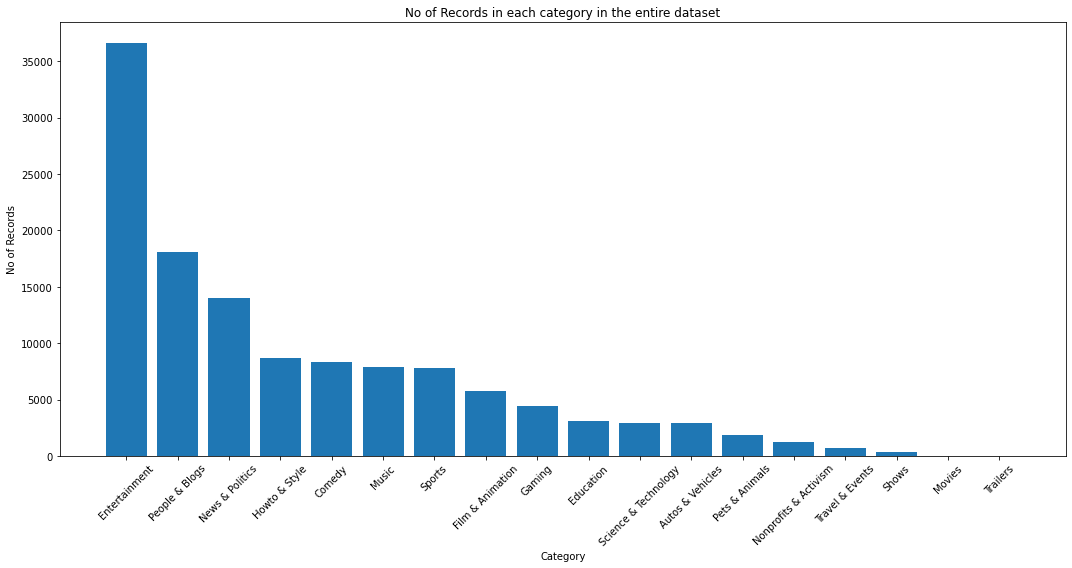

In [55]:
unique_category = df.drop_duplicates(subset="video_id")
series_recordPerCat=unique_category["Category"].value_counts()
plt.figure(figsize=(15,8))
plt.bar(series_recordPerCat.index, series_recordPerCat)
plt.xlabel("Category")
plt.ylabel("No of Records")
plt.title("No of Records in each category in the entire dataset")
plt.xticks(rotation=45)
plt.tight_layout()

In [46]:
df.columns

Index(['video_id', 'viewing_country', 'Total_Trend_Days', 'Video_Title',
       'Publish_Time', 'PublishedAfter_in_Days', 'Origin_Country', 'Category',
       'Tags', 'Duration', 'Language', 'Views', 'Likes', 'Dislikes',
       'Comment_Count', 'Comments_Disabled', 'Ratings_Disabled',
       'Caption_Enabled', 'Video_Description', 'Blocked', 'Allowed',
       'Channel_Title', 'Channel_Description', 'Channel_PublishedAt',
       'Channel_Keywords', 'ChannelTopicCategories', 'GoogleAnalyticsUsed',
       'IsmoderatingComments'],
      dtype='object')

### Analyzing only Entertainment category

In [47]:
# Get the records that only has Entertainment
df_entertainment = df[df["Category"]=="Entertainment"]
df_entertainment.shape

(42890, 28)

In [48]:
len(df_entertainment["video_id"].unique())

36620

Find the country that produces most of the entertainment videos

In [49]:
#!pip install iso3166
#!pip install datapackage
from iso3166 import countries
from datapackage import Package
package = Package('https://datahub.io/core/country-list/datapackage.json')

# print list of all resources:
#print(package.resource_names)

# print processed tabular data (if exists any)
for resource in package.resources:
    if resource.descriptor['datahub']['type'] == 'derived/csv':
        content = resource.read()
ISO_Alpha2_Country_Mapping = {item[1]:item[0] for item in content}
ISO_Alpha2_Country_Mapping['KR']='Korea' #From 'Korea, Republic of' to Korea

In [50]:
df_entertainment["Origin_Country"].value_counts()

US    6800
IN    6105
DE    3722
MX    3148
FR    2933
      ... 
JM       1
GH       1
HU       1
LT       1
KZ       1
Name: Origin_Country, Length: 98, dtype: int64

In [51]:
unique_entertainment = df_entertainment.drop_duplicates(subset="video_id")
unique_entertainment.shape

(36620, 28)

In [52]:
sr_entertanByCountry = unique_entertainment["Origin_Country"].value_counts()
sr_top10Countries= sr_entertanByCountry[0:15]
sr_top10Countries

IN    5125
US    4782
DE    3700
MX    3148
FR    2771
RU    2237
KR    1739
JP    1348
TR     920
ES     676
GB     346
CA     335
TN     314
UA     283
PH     272
Name: Origin_Country, dtype: int64

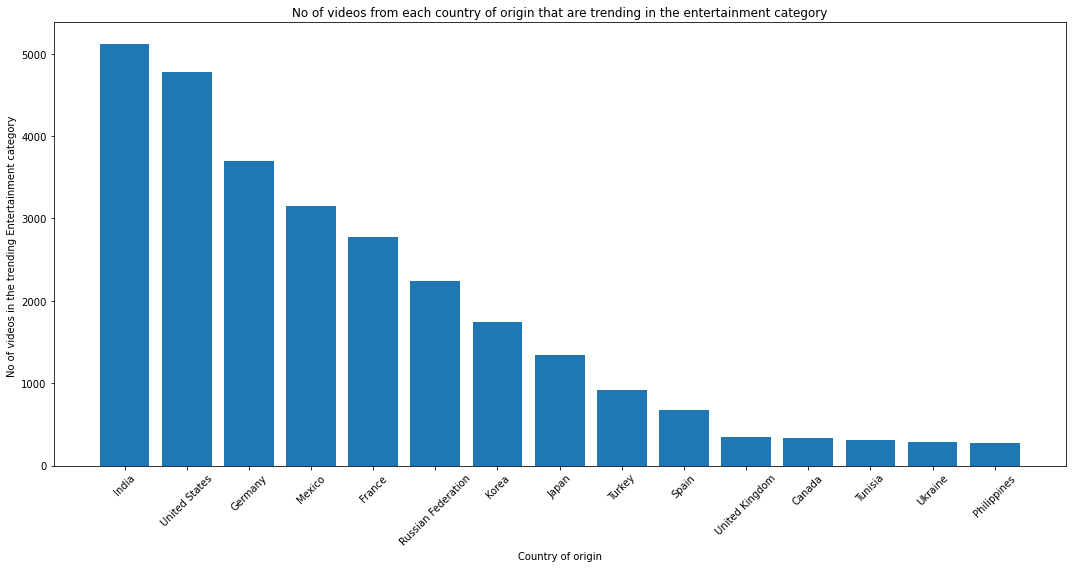

In [53]:
plt.figure(figsize=(15,8))
labels = [ISO_Alpha2_Country_Mapping[cc] for cc in sr_top10Countries.index]
plt.bar(labels, sr_top10Countries)
plt.xlabel("Country of origin")
plt.ylabel("No of videos in the trending Entertainment category ")
plt.title("No of videos from each country of origin that are trending in the entertainment category")
plt.xticks(rotation=45)
plt.tight_layout()
#look at number of views

In [56]:
df["Total_Trend_Days"].value_counts()

1     94346
2     27610
3      9651
4      3792
5      1983
6      1096
7       861
8       458
9       398
11      344
13      330
12      315
10      305
14      223
15      166
16      105
17       88
18       85
20       82
19       66
21       62
22       56
28       49
30       42
31       40
25       37
35       33
36       30
27       29
24       28
29       27
23       27
26       21
33       19
34       17
32       14
37        8
38        3
Name: Total_Trend_Days, dtype: int64

In [57]:
unique_category["Total_Trend_Days"].value_counts()

1     84823
2     24158
3      8163
4      3126
5      1540
6       680
7       428
8       259
9       240
11      232
10      193
12      187
13      162
14       92
15       71
16       52
17       47
20       38
18       35
19       31
22       24
21       24
28       17
24       13
25       12
30       12
27       11
23       10
29       10
35        9
26        9
31        7
32        7
33        6
36        4
34        4
37        1
Name: Total_Trend_Days, dtype: int64

In [74]:
mostPopular= df[df["Total_Trend_Days"]==38]["video_id"]
mostPopular=mostPopular.to_list()
mostPopular[0]

'2z3EUY1aXdY'

In [77]:
mostPopularRecords= df[df["video_id"]== mostPopular[0]]
mostPopularRecords

,video_id,viewing_country,Total_Trend_Days,Video_Title,Publish_Time,PublishedAfter_in_Days,Origin_Country,Category,Tags,Duration,...,Video_Description,Blocked,Allowed,Channel_Title,Channel_Description,Channel_PublishedAt,Channel_Keywords,ChannelTopicCategories,GoogleAnalyticsUsed,IsmoderatingComments
8514,2z3EUY1aXdY,CA,6,Justin Timberlake’s FULL Pepsi Super Bowl LII ...,2018-02-05 01:51:53,1149,NaN,Sports,"NFL|""Football""|""offense""|""defense""|""afc""|""nfc""...",813,...,Justin Timberlake breaks it down during the Pe...,NaN,NaN,NFL,The official YouTube page of the NFL.\n\nSubsc...,2014-12-14 02:07:35,NFL highlights Football offense defense afc nf...,Sport | American_football,False,True
8515,2z3EUY1aXdY,DE,5,Justin Timberlake’s FULL Pepsi Super Bowl LII ...,2018-02-05 01:51:53,1149,NaN,Sports,"NFL|""Football""|""offense""|""defense""|""afc""|""nfc""...",813,...,Justin Timberlake breaks it down during the Pe...,NaN,NaN,NFL,The official YouTube page of the NFL.\n\nSubsc...,2014-12-14 02:07:35,NFL highlights Football offense defense afc nf...,Sport | American_football,False,True
8516,2z3EUY1aXdY,FR,5,Justin Timberlake’s FULL Pepsi Super Bowl LII ...,2018-02-05 01:51:53,1149,NaN,Sports,"NFL""|""Football""|""offense""|""defense""|""afc""|""nfc...",813,...,Justin Timberlake breaks it down during the Pe...,NaN,NaN,NFL,The official YouTube page of the NFL.\n\nSubsc...,2014-12-14 02:07:35,NFL highlights Football offense defense afc nf...,Sport | American_football,False,True
8517,2z3EUY1aXdY,GB,38,Justin Timberlake’s FULL Pepsi Super Bowl LII ...,2018-02-05 01:51:53,1149,NaN,Sports,"NFL|""Football""|""offense""|""defense""|""afc""|""nfc""...",813,...,Justin Timberlake breaks it down during the Pe...,NaN,NaN,NFL,The official YouTube page of the NFL.\n\nSubsc...,2014-12-14 02:07:35,NFL highlights Football offense defense afc nf...,Sport | American_football,False,True
8518,2z3EUY1aXdY,MX,3,Justin Timberlakeâs FULL Pepsi Super Bowl LI...,2018-02-05 01:51:53,1149,NaN,Sports,"NFL|""Football""|""offense""|""defense""|""afc""|""nfc""...",813,...,Justin Timberlake breaks it down during the Pe...,NaN,NaN,NFL,The official YouTube page of the NFL.\n\nSubsc...,2014-12-14 02:07:35,NFL highlights Football offense defense afc nf...,Sport | American_football,False,True
8519,2z3EUY1aXdY,RU,2,Justin Timberlakeâs FULL Pepsi Super Bowl LI...,2018-02-05 01:51:53,1149,NaN,Sports,"NFL|""Football""|""offense""|""defense""|""afc""|""nfc""...",813,...,Justin Timberlake breaks it down during the Pe...,NaN,NaN,NFL,The official YouTube page of the NFL.\n\nSubsc...,2014-12-14 02:07:35,NFL highlights Football offense defense afc nf...,Sport | American_football,False,True
8520,2z3EUY1aXdY,US,4,Justin Timberlake’s FULL Pepsi Super Bowl LII ...,2018-02-05 01:51:53,1149,NaN,Sports,"NFL|""Football""|""offense""|""defense""|""afc""|""nfc""...",813,...,Justin Timberlake breaks it down during the Pe...,NaN,NaN,NFL,The official YouTube page of the NFL.\n\nSubsc...,2014-12-14 02:07:35,NFL highlights Football offense defense afc nf...,Sport | American_football,False,True


In [78]:
mostPopularRecords2= df[df["video_id"]== mostPopular[1]]
mostPopularRecords2

,video_id,viewing_country,Total_Trend_Days,Video_Title,Publish_Time,PublishedAfter_in_Days,Origin_Country,Category,Tags,Duration,...,Video_Description,Blocked,Allowed,Channel_Title,Channel_Description,Channel_PublishedAt,Channel_Keywords,ChannelTopicCategories,GoogleAnalyticsUsed,IsmoderatingComments
29090,BhIEIO0vaBE,CA,6,To Our Daughter,2018-02-04 20:27:38,954,NaN,People & Blogs,"Kylie Jenner|""Kylie""|""Travis Scott""|""Baby""|""An...",693,...,Directed by Tyler Ross @wttyler\nMusic by Jaco...,NaN,NaN,Kylie Jenner,Exclusive videos from Kylie Jenner. Behind-the...,2015-06-26 23:27:04,NaN,Lifestyle_(sociology) | Entertainment | Music,False,False
29091,BhIEIO0vaBE,DE,5,To Our Daughter,2018-02-04 20:27:38,954,NaN,People & Blogs,"Kylie Jenner|""Kylie""|""Travis Scott""|""Baby""|""An...",693,...,Directed by Tyler Ross @wttyler\nMusic by Jaco...,NaN,NaN,Kylie Jenner,Exclusive videos from Kylie Jenner. Behind-the...,2015-06-26 23:27:04,NaN,Lifestyle_(sociology) | Entertainment | Music,False,False
29092,BhIEIO0vaBE,FR,4,To Our Daughter,2018-02-04 20:27:38,954,NaN,People & Blogs,"Kylie Jenner""|""Kylie""|""Travis Scott""|""Baby""|""A...",693,...,Directed by Tyler Ross @wttyler\nMusic by Jaco...,NaN,NaN,Kylie Jenner,Exclusive videos from Kylie Jenner. Behind-the...,2015-06-26 23:27:04,NaN,Lifestyle_(sociology) | Entertainment | Music,False,False
29093,BhIEIO0vaBE,GB,38,To Our Daughter,2018-02-04 20:27:38,954,NaN,People & Blogs,"Kylie Jenner|""Kylie""|""Travis Scott""|""Baby""|""An...",693,...,Directed by Tyler Ross @wttyler\nMusic by Jaco...,NaN,NaN,Kylie Jenner,Exclusive videos from Kylie Jenner. Behind-the...,2015-06-26 23:27:04,NaN,Lifestyle_(sociology) | Entertainment | Music,False,False
29094,BhIEIO0vaBE,KR,1,To Our Daughter,2018-02-04 20:27:38,954,NaN,People & Blogs,"Kylie Jenner|""Kylie""|""Travis Scott""|""Baby""|""An...",693,...,Directed by Tyler Ross @wttyler\nMusic by Jaco...,NaN,NaN,Kylie Jenner,Exclusive videos from Kylie Jenner. Behind-the...,2015-06-26 23:27:04,NaN,Lifestyle_(sociology) | Entertainment | Music,False,False
29095,BhIEIO0vaBE,MX,3,To Our Daughter,2018-02-04 20:27:38,954,NaN,People & Blogs,"Kylie Jenner|""Kylie""|""Travis Scott""|""Baby""|""An...",693,...,Directed by Tyler Ross @wttyler\nMusic by Jaco...,NaN,NaN,Kylie Jenner,Exclusive videos from Kylie Jenner. Behind-the...,2015-06-26 23:27:04,NaN,Lifestyle_(sociology) | Entertainment | Music,False,False
29096,BhIEIO0vaBE,RU,2,To Our Daughter,2018-02-04 20:27:38,954,NaN,People & Blogs,"Kylie Jenner|""Kylie""|""Travis Scott""|""Baby""|""An...",693,...,Directed by Tyler Ross @wttyler\nMusic by Jaco...,NaN,NaN,Kylie Jenner,Exclusive videos from Kylie Jenner. Behind-the...,2015-06-26 23:27:04,NaN,Lifestyle_(sociology) | Entertainment | Music,False,False
29097,BhIEIO0vaBE,US,10,To Our Daughter,2018-02-04 20:27:38,954,NaN,People & Blogs,"Kylie Jenner|""Kylie""|""Travis Scott""|""Baby""|""An...",693,...,Directed by Tyler Ross @wttyler\nMusic by Jaco...,NaN,NaN,Kylie Jenner,Exclusive videos from Kylie Jenner. Behind-the...,2015-06-26 23:27:04,NaN,Lifestyle_(sociology) | Entertainment | Music,False,False


In [79]:
mostPopularRecords3= df[df["video_id"]== mostPopular[2]]
mostPopularRecords3

,video_id,viewing_country,Total_Trend_Days,Video_Title,Publish_Time,PublishedAfter_in_Days,Origin_Country,Category,Tags,Duration,...,Video_Description,Blocked,Allowed,Channel_Title,Channel_Description,Channel_PublishedAt,Channel_Keywords,ChannelTopicCategories,GoogleAnalyticsUsed,IsmoderatingComments
56549,NooW_RbfdWI,CA,6,Jurassic World: Fallen Kingdom - Official Trai...,2018-02-04 23:28:16,4248,NaN,Entertainment,"Jurassic World|""Fallen Kingdom""|""Dinosaur""|""T-...",96,...,Jurassic World: Fallen Kingdom \nIn Theaters J...,NaN,NaN,Universal Pictures,Welcome to the official Universal Pictures You...,2006-06-19 12:06:41,"Bourne ""Judd Apatow"" ""Pitch Perfect"" ""Despicab...",Music | Television_program | Entertainment | Film,True,False
56550,NooW_RbfdWI,DE,5,Jurassic World: Fallen Kingdom - Official Trai...,2018-02-04 23:28:16,4248,NaN,Entertainment,"Jurassic World|""Fallen Kingdom""|""Dinosaur""|""T-...",96,...,Jurassic World: Fallen Kingdom \nIn Theaters J...,NaN,NaN,Universal Pictures,Welcome to the official Universal Pictures You...,2006-06-19 12:06:41,"Bourne ""Judd Apatow"" ""Pitch Perfect"" ""Despicab...",Music | Television_program | Entertainment | Film,True,False
56551,NooW_RbfdWI,FR,3,Jurassic World: Fallen Kingdom - Official Trai...,2018-02-04 23:28:16,4248,NaN,Entertainment,"Jurassic World""|""Fallen Kingdom""|""Dinosaur""|""T...",96,...,Jurassic World: Fallen Kingdom \nIn Theaters J...,NaN,NaN,Universal Pictures,Welcome to the official Universal Pictures You...,2006-06-19 12:06:41,"Bourne ""Judd Apatow"" ""Pitch Perfect"" ""Despicab...",Music | Television_program | Entertainment | Film,True,False
56552,NooW_RbfdWI,GB,38,Jurassic World: Fallen Kingdom - Official Trai...,2018-02-04 23:28:16,4248,NaN,Entertainment,"Jurassic World|""Fallen Kingdom""|""Dinosaur""|""T-...",96,...,Jurassic World: Fallen Kingdom \nIn Theaters J...,NaN,NaN,Universal Pictures,Welcome to the official Universal Pictures You...,2006-06-19 12:06:41,"Bourne ""Judd Apatow"" ""Pitch Perfect"" ""Despicab...",Music | Television_program | Entertainment | Film,True,False
56553,NooW_RbfdWI,IN,6,Jurassic World: Fallen Kingdom - Official Trai...,2018-02-04 23:28:16,4248,NaN,Entertainment,"Jurassic World|""Fallen Kingdom""|""Dinosaur""|""T-...",96,...,Jurassic World: Fallen Kingdom \nIn Theaters J...,NaN,NaN,Universal Pictures,Welcome to the official Universal Pictures You...,2006-06-19 12:06:41,"Bourne ""Judd Apatow"" ""Pitch Perfect"" ""Despicab...",Music | Television_program | Entertainment | Film,True,False
56554,NooW_RbfdWI,KR,2,Jurassic World: Fallen Kingdom - Official Trai...,2018-02-04 23:28:16,4248,NaN,Entertainment,"Jurassic World|""Fallen Kingdom""|""Dinosaur""|""T-...",96,...,Jurassic World: Fallen Kingdom \nIn Theaters J...,NaN,NaN,Universal Pictures,Welcome to the official Universal Pictures You...,2006-06-19 12:06:41,"Bourne ""Judd Apatow"" ""Pitch Perfect"" ""Despicab...",Music | Television_program | Entertainment | Film,True,False
56555,NooW_RbfdWI,MX,3,Jurassic World: Fallen Kingdom - Official Trai...,2018-02-04 23:28:16,4248,NaN,Entertainment,"Jurassic World|""Fallen Kingdom""|""Dinosaur""|""T-...",96,...,Jurassic World: Fallen Kingdom \nIn Theaters J...,NaN,NaN,Universal Pictures,Welcome to the official Universal Pictures You...,2006-06-19 12:06:41,"Bourne ""Judd Apatow"" ""Pitch Perfect"" ""Despicab...",Music | Television_program | Entertainment | Film,True,False
56556,NooW_RbfdWI,RU,2,Jurassic World: Fallen Kingdom - Official Trai...,2018-02-04 23:28:16,4248,NaN,Entertainment,"Jurassic World|""Fallen Kingdom""|""Dinosaur""|""T-...",96,...,Jurassic World: Fallen Kingdom \nIn Theaters J...,NaN,NaN,Universal Pictures,Welcome to the official Universal Pictures You...,2006-06-19 12:06:41,"Bourne ""Judd Apatow"" ""Pitch Perfect"" ""Despicab...",Music | Television_program | Entertainment | Film,True,False
56557,NooW_RbfdWI,US,10,Jurassic World: Fallen Kingdom - Official Trai...,2018-02-04 23:28:16,4248,NaN,Entertainment,"Jurassic World|""F

In [81]:
mostPopular= df[df["Total_Trend_Days"]==37]["video_id"]
mostPopular=mostPopular.to_list()
len(mostPopular)

8

In [82]:
mostPopularRecords= df[df["video_id"]== mostPopular[0]]
mostPopularRecords

,video_id,viewing_country,Total_Trend_Days,Video_Title,Publish_Time,PublishedAfter_in_Days,Origin_Country,Category,Tags,Duration,...,Video_Description,Blocked,Allowed,Channel_Title,Channel_Description,Channel_PublishedAt,Channel_Keywords,ChannelTopicCategories,GoogleAnalyticsUsed,IsmoderatingComments
13242,4uTNVumfm84,CA,5,Maroon 5 - Wait,2018-02-08 14:00:00,3194,US,Music,"Maroon|""Wait""|""222""|""Records/Interscope""|""Reco...",215,...,RED PILL BLUES” is out now.\nhttp://smarturl.i...,NaN,NaN,Maroon5VEVO,"Maroon 5 on Vevo - Official Music Videos, Live...",2009-05-12 05:28:41,vevo music video official,Pop_music | Music | Electronic_music,True,False
13243,4uTNVumfm84,DE,3,Maroon 5 - Wait,2018-02-08 14:00:00,3194,US,Music,"Maroon|""Wait""|""222""|""Records/Interscope""|""Reco...",215,...,RED PILL BLUES” is out now.\nhttp://smarturl.i...,NaN,NaN,Maroon5VEVO,"Maroon 5 on Vevo - Official Music Videos, Live...",2009-05-12 05:28:41,vevo music video official,Pop_music | Music | Electronic_music,True,False
13244,4uTNVumfm84,FR,2,Maroon 5 - Wait,2018-02-08 14:00:00,3194,US,Music,"Maroon""|""Wait""|""222""|""Records/Interscope""|""Rec...",215,...,RED PILL BLUES” is out now.\nhttp://smarturl.i...,NaN,NaN,Maroon5VEVO,"Maroon 5 on Vevo - Official Music Videos, Live...",2009-05-12 05:28:41,vevo music video official,Pop_music | Music | Electronic_music,True,False
13245,4uTNVumfm84,GB,37,Maroon 5 - Wait,2018-02-08 14:00:00,3194,US,Music,"Maroon|""Wait""|""222""|""Records/Interscope""|""Reco...",215,...,RED PILL BLUES” is out now.\nhttp://smarturl.i...,NaN,NaN,Maroon5VEVO,"Maroon 5 on Vevo - Official Music Videos, Live...",2009-05-12 05:28:41,vevo music video official,Pop_music | Music | Electronic_music,True,False
13246,4uTNVumfm84,JP,1,Maroon 5 - Wait,2018-02-08 14:00:00,3194,US,Music,"Maroon|""Wait""|""222""|""Records/Interscope""|""Reco...",215,...,RED PILL BLUESâ is out now.\nhttp://smarturl...,NaN,NaN,Maroon5VEVO,"Maroon 5 on Vevo - Official Music Videos, Live...",2009-05-12 05:28:41,vevo music video official,Pop_music | Music | Electronic_music,True,False
13247,4uTNVumfm84,KR,1,Maroon 5 - Wait,2018-02-08 14:00:00,3194,US,Music,"Maroon|""Wait""|""222""|""Records/Interscope""|""Reco...",215,...,RED PILL BLUESâ is out now.\nhttp://smarturl...,NaN,NaN,Maroon5VEVO,"Maroon 5 on Vevo - Official Music Videos, Live...",2009-05-12 05:28:41,vevo music video official,Pop_music | Music | Electronic_music,True,False
13248,4uTNVumfm84,MX,1,Maroon 5 - Wait,2018-02-08 14:00:00,3194,US,Music,"Maroon|""Wait""|""222""|""Records/Interscope""|""Reco...",215,...,RED PILL BLUESâ is out now.\nhttp://smarturl...,NaN,NaN,Maroon5VEVO,"Maroon 5 on Vevo - Official Music Videos, Live...",2009-05-12 05:28:41,vevo music video official,Pop_music | Music | Electronic_music,True,False
13249,4uTNVumfm84,RU,1,Maroon 5 - Wait,2018-02-08 14:00:00,3194,US,Music,"Maroon|""Wait""|""222""|""Records/Interscope""|""Reco...",215,...,RED PILL BLUESâ is out now.\nhttp://smarturl...,NaN,NaN,Maroon5VEVO,"Maroon 5 on Vevo - Official Music Videos, Live...",2009-05-12 05:28:41,vevo music video official,Pop_music | Music | Electronic_music,True,False
13250,4uTNVumfm84,US,10,Maroon 5 - Wait,2018-02-08 14:00:00,3194,US,Music,"Maroon|""Wait""|""222""|""Records/Interscope""|""Reco...",215,...,RED PILL BLUES” is out now.\nhttp://smarturl.i...,NaN,NaN,Maroon5VEVO,"Maroon 5 on Vevo - Official Music Videos, Live...",2009-05-12 05:28:41,vevo music video official,Pop_music | Music | Electronic_music,True,False


In [83]:
mostPopularRecords= df[df["video_id"]== mostPopular[1]]
mostPopularRecords

,video_id,viewing_country,Total_Trend_Days,Video_Title,Publish_Time,PublishedAfter_in_Days,Origin_Country,Category,Tags,Duration,...,Video_Description,Blocked,Allowed,Channel_Title,Channel_Description,Channel_PublishedAt,Channel_Keywords,ChannelTopicCategories,GoogleAnalyticsUsed,IsmoderatingComments
25585,ABLsSWE06q4,GB,37,"Whethan, Dua Lipa - High (Audio)",2018-02-08 21:00:01,420,NaN,Music,"Whethan|""Dua""|""Lipa""|""High""|""Republic/Universa...",198,...,High (Official Audio)\nSong available on the F...,NaN,NaN,FiftyShadesVEVO,,2016-12-16 00:39:41,NaN,Pop_music | Electronic_music | Music,False,False


In [84]:
mostPopularRecords= df[df["video_id"]== mostPopular[2]]
mostPopularRecords

,video_id,viewing_country,Total_Trend_Days,Video_Title,Publish_Time,PublishedAfter_in_Days,Origin_Country,Category,Tags,Duration,...,Video_Description,Blocked,Allowed,Channel_Title,Channel_Description,Channel_PublishedAt,Channel_Keywords,ChannelTopicCategories,GoogleAnalyticsUsed,IsmoderatingComments
61427,Q17z9a03YaM,CA,4,Rich Brian - Cold (Official Music Video),2018-02-20 13:51:08,704,NaN,Entertainment,"88rising|""cold""|""amen""|""rich brian""|""music vid...",231,...,COLD\n\nAmen available worldwide now: https://...,NaN,NaN,88rising,88 is double happiness,2016-03-18 17:51:35,NaN,Pop_music | Hip_hop_music | Music,False,False
61428,Q17z9a03YaM,DE,1,Rich Brian - Cold (Official Music Video),2018-02-20 13:51:08,704,NaN,Entertainment,"88rising|""cold""|""amen""|""rich brian""|""music vid...",231,...,COLD\n\nAmen available worldwide now: https://...,NaN,NaN,88rising,88 is double happiness,2016-03-18 17:51:35,NaN,Pop_music | Hip_hop_music | Music,False,False
61429,Q17z9a03YaM,FR,1,Rich Brian - Cold (Official Music Video),2018-02-20 13:51:08,704,NaN,Entertainment,"88rising""|""cold""|""amen""|""rich brian""|""music vi...",231,...,COLD\n\nAmen available worldwide now: https://...,NaN,NaN,88rising,88 is double happiness,2016-03-18 17:51:35,NaN,Pop_music | Hip_hop_music | Music,False,False
61430,Q17z9a03YaM,GB,37,Rich Brian - Cold (Official Music Video),2018-02-20 13:51:08,704,NaN,Entertainment,"88rising|""cold""|""amen""|""rich brian""|""music vid...",231,...,COLD\n\nAmen available worldwide now: https://...,NaN,NaN,88rising,88 is double happiness,2016-03-18 17:51:35,NaN,Pop_music | Hip_hop_music | Music,False,False


In [85]:
mostPopularRecords= df[df["video_id"]== mostPopular[3]]
mostPopularRecords

,video_id,viewing_country,Total_Trend_Days,Video_Title,Publish_Time,PublishedAfter_in_Days,Origin_Country,Category,Tags,Duration,...,Video_Description,Blocked,Allowed,Channel_Title,Channel_Description,Channel_PublishedAt,Channel_Keywords,ChannelTopicCategories,GoogleAnalyticsUsed,IsmoderatingComments
72679,V5cOvyDpWfM,CA,7,Fergie Performs The U.S. National Anthem / 201...,2018-02-19 01:37:11,231,US,Sports,"mlg highlights|""mlg""|""basketball""|""highlights""...",160,...,🏀Fergie Performs The U.S. National Anthem / 20...,NaN,NaN,MLG Highlights,CHANNEL FORMERLY MLG HIGHLIGHTS is now operate...,2017-07-02 16:05:05,"nba sports podcast media basketball pavy tpj ""...",Basketball | Sport,False,False
72680,V5cOvyDpWfM,DE,3,Fergie Performs The U.S. National Anthem / 201...,2018-02-19 01:37:11,231,US,Sports,"mlg highlights|""mlg""|""basketball""|""highlights""...",160,...,🏀Fergie Performs The U.S. National Anthem / 20...,NaN,NaN,MLG Highlights,CHANNEL FORMERLY MLG HIGHLIGHTS is now operate...,2017-07-02 16:05:05,"nba sports podcast media basketball pavy tpj ""...",Basketball | Sport,False,False
72681,V5cOvyDpWfM,FR,2,Fergie Performs The U.S. National Anthem / 201...,2018-02-19 01:37:11,231,US,Sports,"mlg highlights""|""mlg""|""basketball""|""highlights...",160,...,🏀Fergie Performs The U.S. National Anthem / 20...,NaN,NaN,MLG Highlights,CHANNEL FORMERLY MLG HIGHLIGHTS is now operate...,2017-07-02 16:05:05,"nba sports podcast media basketball pavy tpj ""...",Basketball | Sport,False,False
72682,V5cOvyDpWfM,GB,37,Fergie Performs The U.S. National Anthem / 201...,2018-02-19 01:37:11,231,US,Sports,"mlg highlights|""mlg""|""basketball""|""highlights""...",160,...,🏀Fergie Performs The U.S. National Anthem / 20...,NaN,NaN,MLG Highlights,CHANNEL FORMERLY MLG HIGHLIGHTS is now operate...,2017-07-02 16:05:05,"nba sports podcast media basketball pavy tpj ""...",Basketball | Sport,False,False
72683,V5cOvyDpWfM,MX,1,Fergie Performs The U.S. National Anthem / 201...,2018-02-19 01:37:11,231,US,Sports,"mlg highlights|""mlg""|""basketball""|""highlights""...",160,...,ðFergie Performs The U.S. National Anthem /...,NaN,NaN,MLG Highlights,CHANNEL FORMERLY MLG HIGHLIGHTS is now operate...,2017-07-02 16:05:05,"nba sports podcast media basketball pavy tpj ""...",Basketball | Sport,False,False
72684,V5cOvyDpWfM,US,7,Fergie Performs The U.S. National Anthem / 201...,2018-02-19 01:37:11,231,US,Sports,"mlg highlights|""mlg""|""basketball""|""highlights""...",160,...,🏀Fergie Performs The U.S. National Anthem / 20...,NaN,NaN,MLG Highlights,CHANNEL FORMERLY MLG HIGHLIGHTS is now operate...,2017-07-02 16:05:05,"nba sports podcast media basketball pavy tpj ""...",Basketball | Sport,False,False


In [86]:
mostPopularRecords= df[df["video_id"]== mostPopular[4]]
mostPopularRecords

,video_id,viewing_country,Total_Trend_Days,Video_Title,Publish_Time,PublishedAfter_in_Days,Origin_Country,Category,Tags,Duration,...,Video_Description,Blocked,Allowed,Channel_Title,Channel_Description,Channel_PublishedAt,Channel_Keywords,ChannelTopicCategories,GoogleAnalyticsUsed,IsmoderatingComments
79421,YBpdL9hSac4,CA,7,Incredibles 2 - Olympics Sneak Peek,2018-02-15 03:34:44,4166,US,Film & Animation,"Pixar|""Disney""|""Disney Pixar""|""Pixar Movie""|""A...",91,...,The Incredibles are back on June 15. 💥 Watch ...,NaN,NaN,Disney•Pixar,The Official Pixar YouTube Channel.,2006-09-19 17:42:01,pixar disney animation toy story finding nemo ...,Entertainment | Film | Music,False,True
79422,YBpdL9hSac4,DE,5,Incredibles 2 - Olympics Sneak Peek,2018-02-15 03:34:44,4166,US,Film & Animation,"Pixar|""Disney""|""Disney Pixar""|""Pixar Movie""|""A...",91,...,The Incredibles are back on June 15. 💥 Watch ...,NaN,NaN,Disney•Pixar,The Official Pixar YouTube Channel.,2006-09-19 17:42:01,pixar disney animation toy story finding nemo ...,Entertainment | Film | Music,False,True
79423,YBpdL9hSac4,FR,4,Incredibles 2 - Olympics Sneak Peek,2018-02-15 03:34:44,4166,US,Film & Animation,"Pixar""|""Disney""|""Disney Pixar""|""Pixar Movie""|""...",91,...,The Incredibles are back on June 15. 💥 Watch ...,NaN,NaN,Disney•Pixar,The Official Pixar YouTube Channel.,2006-09-19 17:42:01,pixar disney animation toy story finding nemo ...,Entertainment | Film | Music,False,True
79424,YBpdL9hSac4,GB,37,Incredibles 2 - Olympics Sneak Peek,2018-02-15 03:34:44,4166,US,Film & Animation,"Pixar|""Disney""|""Disney Pixar""|""Pixar Movie""|""A...",91,...,The Incredibles are back on June 15. 💥 Watch ...,NaN,NaN,Disney•Pixar,The Official Pixar YouTube Channel.,2006-09-19 17:42:01,pixar disney animation toy story finding nemo ...,Entertainment | Film | Music,False,True
79425,YBpdL9hSac4,IN,6,Incredibles 2 - Olympics Sneak Peek,2018-02-15 03:34:44,4166,US,Film & Animation,"Pixar|""Disney""|""Disney Pixar""|""Pixar Movie""|""A...",91,...,The Incredibles are back on June 15. 💥 Watch ...,NaN,NaN,Disney•Pixar,The Official Pixar YouTube Channel.,2006-09-19 17:42:01,pixar disney animation toy story finding nemo ...,Entertainment | Film | Music,False,True
79426,YBpdL9hSac4,JP,1,Incredibles 2 - Olympics Sneak Peek,2018-02-15 03:34:44,4166,US,Film & Animation,"Pixar|""Disney""|""Disney Pixar""|""Pixar Movie""|""A...",91,...,The Incredibles are back on June 15. ð¥ Wat...,NaN,NaN,Disneyâ¢Pixar,The Official Pixar YouTube Channel.,2006-09-19 17:42:01,pixar disney animation toy story finding nemo ...,Entertainment | Film | Music,False,True
79427,YBpdL9hSac4,KR,5,Incredibles 2 - Olympics Sneak Peek,2018-02-15 03:34:44,4166,US,Film & Animation,"Pixar|""Disney""|""Disney Pixar""|""Pixar Movie""|""A...",91,...,The Incredibles are back on June 15. ð¥ Wat...,NaN,NaN,Disneyâ¢Pixar,The Official Pixar YouTube Channel.,2006-09-19 17:42:01,pixar disney animation toy story finding nemo ...,Entertainment | Film | Music,False,True
79428,YBpdL9hSac4,MX,2,Incredibles 2 - Olympics Sneak Peek,2018-02-15 03:34:44,4166,US,Film & Animation,"Pixar|""Disney""|""Disney Pixar""|""Pixar Movie""|""A...",91,...,The Incredibles are back on June 15. ð¥ Wat...,NaN,NaN,Disneyâ¢Pixar,The Official Pixar YouTube Channel.,2006-09-19 17:42:01,pixar disney animation toy story finding nemo ...,Entertainment | Film | Music,False,True
79429,YBpdL9hSac4,US,11,Incredibles 2 - Olympics Sneak Peek,2018-02-15 03:34:44,4166,US,Film & Animation,"Pixar|""Disney""|""Disney Pixar""|""Pixar Movie""|""A...",91,...,The Incredibles are back on June 15. 💥 Watch ...,NaN,NaN,Disney•Pixar,The Official Pixar YouTube Channel.,2006-09-19 17:42:01,pixar disney animation toy story finding nemo ...,Entertainment | Film | Music,False,True


In [87]:
mostPopularRecords= df[df["video_id"]== mostPopular[5]]
mostPopularRecords

,video_id,viewing_country,Total_Trend_Days,Video_Title,Publish_Time,PublishedAfter_in_Days,Origin_Country,Category,Tags,Duration,...,Video_Description,Blocked,Allowed,Channel_Title,Channel_Description,Channel_PublishedAt,Channel_Keywords,ChannelTopicCategories,GoogleAnalyticsUsed,IsmoderatingComments
94276,dzxFdtWmjto,CA,5,VENOM - Official Teaser Trailer (HD),2018-02-08 14:00:04,4269,US,Entertainment,"Venom|""Venom Movie""|""Venom (2018)""|""Marvel""|""M...",110,...,Watch the #Venom teaser trailer now. 10.5.18.\...,NaN,NaN,Sony Pictures Entertainment,Welcome to the official channel for Sony Pictu...,2006-06-02 21:21:23,"""Sony Pictures"" ""Official Trailer"" Movies Film...",Film | Entertainment | Television_program | Music,False,True
94277,dzxFdtWmjto,DE,3,VENOM - Official Teaser Trailer (HD),2018-02-08 14:00:04,4269,US,Entertainment,"Venom|""Venom Movie""|""Venom (2018)""|""Marvel""|""M...",110,...,Watch the #Venom teaser trailer now. 10.5.18.\...,NaN,NaN,Sony Pictures Entertainment,Welcome to the official channel for Sony Pictu...,2006-06-02 21:21:23,"""Sony Pictures"" ""Official Trailer"" Movies Film...",Film | Entertainment | Television_program | Music,False,True
94278,dzxFdtWmjto,FR,3,VENOM - Official Teaser Trailer (HD),2018-02-08 14:00:04,4269,US,Entertainment,"Venom""|""Venom Movie""|""Venom (2018)""|""Marvel""|""...",110,...,Watch the #Venom teaser trailer now. 10.5.18.\...,NaN,NaN,Sony Pictures Entertainment,Welcome to the official channel for Sony Pictu...,2006-06-02 21:21:23,"""Sony Pictures"" ""Official Trailer"" Movies Film...",Film | Entertainment | Television_program | Music,False,True
94279,dzxFdtWmjto,GB,37,VENOM - Official Teaser Trailer (HD),2018-02-08 14:00:04,4269,US,Entertainment,"Venom|""Venom Movie""|""Venom (2018)""|""Marvel""|""M...",110,...,Watch the #Venom teaser trailer now. 10.5.18.\...,NaN,NaN,Sony Pictures Entertainment,Welcome to the official channel for Sony Pictu...,2006-06-02 21:21:23,"""Sony Pictures"" ""Official Trailer"" Movies Film...",Film | Entertainment | Television_program | Music,False,True
94280,dzxFdtWmjto,IN,5,VENOM - Official Teaser Trailer (HD),2018-02-08 14:00:04,4269,US,Entertainment,"Venom|""Venom Movie""|""Venom (2018)""|""Marvel""|""M...",110,...,Watch the #Venom teaser trailer now. 10.5.18.\...,NaN,NaN,Sony Pictures Entertainment,Welcome to the official channel for Sony Pictu...,2006-06-02 21:21:23,"""Sony Pictures"" ""Official Trailer"" Movies Film...",Film | Entertainment | Television_program | Music,False,True
94281,dzxFdtWmjto,JP,1,VENOM - Official Teaser Trailer (HD),2018-02-08 14:00:04,4269,US,Entertainment,"Venom|""Venom Movie""|""Venom (2018)""|""Marvel""|""M...",110,...,Watch the #Venom teaser trailer now. 10.5.18.\...,NaN,NaN,Sony Pictures Entertainment,Welcome to the official channel for Sony Pictu...,2006-06-02 21:21:23,"""Sony Pictures"" ""Official Trailer"" Movies Film...",Film | Entertainment | Television_program | Music,False,True
94282,dzxFdtWmjto,KR,2,VENOM - Official Teaser Trailer (HD),2018-02-08 14:00:04,4269,US,Entertainment,"Venom|""Venom Movie""|""Venom (2018)""|""Marvel""|""M...",110,...,Watch the #Venom teaser trailer now. 10.5.18.\...,NaN,NaN,Sony Pictures Entertainment,Welcome to the official channel for Sony Pictu...,2006-06-02 21:21:23,"""Sony Pictures"" ""Official Trailer"" Movies Film...",Film | Entertainment | Television_program | Music,False,True
94283,dzxFdtWmjto,MX,2,VENOM - Official Teaser Trailer (HD),2018-02-08 14:00:04,4269,US,Entertainment,"Venom|""Venom Movie""|""Venom (2018)""|""Marvel""|""M...",110,...,Watch the #Venom teaser trailer now. 10.5.18.\...,NaN,NaN,Sony Pictures Entertainment,Welcome to the official channel for Sony Pictu...,2006-06-02 21:21:23,"""Sony Pictures"" ""Official Trailer"" Movies Film...",Film | Entertainment | Television_program | Music,False,True
94284,dzxFdtWmjto,US,10,VENOM - Official Teaser Trailer (HD),2018-02-08 14:00:04,4269,US,Entertainment,"Venom|""Venom Movie""|""Venom (2018)""|""Marvel""|""M...

In [88]:
mostPopularRecords= df[df["video_id"]== mostPopular[6]]
mostPopularRecords

,video_id,viewing_country,Total_Trend_Days,Video_Title,Publish_Time,PublishedAfter_in_Days,Origin_Country,Category,Tags,Duration,...,Video_Description,Blocked,Allowed,Channel_Title,Channel_Description,Channel_PublishedAt,Channel_Keywords,ChannelTopicCategories,GoogleAnalyticsUsed,IsmoderatingComments
96087,elwTgpHlty0,CA,5,[OFFICIAL VIDEO] HAVANA - PENTATONIX,2018-02-23 15:00:09,2358,NaN,Music,"Pentatonix|""Penatonix""|""PTX""|""PTXofficial""|""Mi...",194,...,BUY HAVANA:\niTunes - http://smarturl.it/PTXHV...,NaN,NaN,PTXofficial,Three-time Grammy® Award-winning and multi-Pla...,2011-09-10 17:09:59,Pentatonix PTX music christmas holiday pop sin...,Performing_arts | Music | Pop_music | Entertai...,False,False
96088,elwTgpHlty0,DE,3,[OFFICIAL VIDEO] HAVANA - PENTATONIX,2018-02-23 15:00:09,2358,NaN,Music,"Pentatonix|""Penatonix""|""PTX""|""PTXofficial""|""Mi...",194,...,BUY HAVANA:\niTunes - http://smarturl.it/PTXHV...,NaN,NaN,PTXofficial,Three-time Grammy® Award-winning and multi-Pla...,2011-09-10 17:09:59,Pentatonix PTX music christmas holiday pop sin...,Performing_arts | Music | Pop_music | Entertai...,False,False
96089,elwTgpHlty0,FR,2,[OFFICIAL VIDEO] HAVANA - PENTATONIX,2018-02-23 15:00:09,2358,NaN,Music,"Pentatonix""|""Penatonix""|""PTX""|""PTXofficial""|""M...",194,...,BUY HAVANA:\niTunes - http://smarturl.it/PTXHV...,NaN,NaN,PTXofficial,Three-time Grammy® Award-winning and multi-Pla...,2011-09-10 17:09:59,Pentatonix PTX music christmas holiday pop sin...,Performing_arts | Music | Pop_music | Entertai...,False,False
96090,elwTgpHlty0,GB,37,[OFFICIAL VIDEO] HAVANA - PENTATONIX,2018-02-23 15:00:09,2358,NaN,Music,"Pentatonix|""Penatonix""|""PTX""|""PTXofficial""|""Mi...",194,...,BUY HAVANA:\niTunes - http://smarturl.it/PTXHV...,NaN,NaN,PTXofficial,Three-time Grammy® Award-winning and multi-Pla...,2011-09-10 17:09:59,Pentatonix PTX music christmas holiday pop sin...,Performing_arts | Music | Pop_music | Entertai...,False,False
96091,elwTgpHlty0,JP,1,[OFFICIAL VIDEO] HAVANA - PENTATONIX,2018-02-23 15:00:09,2358,NaN,Music,"Pentatonix|""Penatonix""|""PTX""|""PTXofficial""|""Mi...",194,...,BUY HAVANA:\niTunes - http://smarturl.it/PTXHV...,NaN,NaN,PTXofficial,Three-time Grammy® Award-winning and multi-Pla...,2011-09-10 17:09:59,Pentatonix PTX music christmas holiday pop sin...,Performing_arts | Music | Pop_music | Entertai...,False,False
96092,elwTgpHlty0,KR,2,[OFFICIAL VIDEO] HAVANA - PENTATONIX,2018-02-23 15:00:09,2358,NaN,Music,"Pentatonix|""Penatonix""|""PTX""|""PTXofficial""|""Mi...",194,...,BUY HAVANA:\niTunes - http://smarturl.it/PTXHV...,NaN,NaN,PTXofficial,Three-time Grammy® Award-winning and multi-Pla...,2011-09-10 17:09:59,Pentatonix PTX music christmas holiday pop sin...,Performing_arts | Music | Pop_music | Entertai...,False,False
96093,elwTgpHlty0,MX,1,[OFFICIAL VIDEO] HAVANA - PENTATONIX,2018-02-23 15:00:09,2358,NaN,Music,"Pentatonix|""Penatonix""|""PTX""|""PTXofficial""|""Mi...",194,...,BUY HAVANA:\niTunes - http://smarturl.it/PTXHV...,NaN,NaN,PTXofficial,Three-time Grammy® Award-winning and multi-Pla...,2011-09-10 17:09:59,Pentatonix PTX music christmas holiday pop sin...,Performing_arts | Music | Pop_music | Entertai...,False,False
96094,elwTgpHlty0,RU,1,[OFFICIAL VIDEO] HAVANA - PENTATONIX,2018-02-23 15:00:09,2358,NaN,Music,"Pentatonix|""Penatonix""|""PTX""|""PTXofficial""|""Mi...",194,...,BUY HAVANA:\niTunes - http://smarturl.it/PTXHV...,NaN,NaN,PTXofficial,Three-time Grammy® Award-winning and multi-Pla...,2011-09-10 17:09:59,Pentatonix PTX music christmas holiday pop sin...,Performing_arts | Music | Pop_music | Entertai...,False,False
96095,elwTgpHlty0,US,13,[OFFICIAL VIDEO] HAVANA - PENTATONIX,2018-02-23 15:00:09,2358,NaN,Music,"Pentatonix|""Penatonix""|""PTX""|""PTXofficial""|""Mi...",194,...,BUY HAVANA:\niTunes - http://smarturl.it/PTXHV...,NaN,NaN,PTXofficial,Three-time Grammy® Award-winning and multi-Pla...,2011-09-10 17:09:59,Pentatonix PTX music christmas holiday pop sin...,Performing_arts | Music | Pop_m

In [89]:
mostPopularRecords= df[df["video_id"]== mostPopular[7]]
mostPopularRecords

,video_id,viewing_country,Total_Trend_Days,Video_Title,Publish_Time,PublishedAfter_in_Days,Origin_Country,Category,Tags,Duration,...,Video_Description,Blocked,Allowed,Channel_Title,Channel_Description,Channel_PublishedAt,Channel_Keywords,ChannelTopicCategories,GoogleAnalyticsUsed,IsmoderatingComments
131092,u_C4onVrr8U,CA,4,"Miguel - Come Through and Chill ft. J. Cole, S...",2018-04-25 16:00:11,2907,NaN,Music,"ByStorm Entertainment/RCA Records|""Come Throug...",278,...,“Come Through and Chill” ft. J. Cole out now! ...,NaN,"[SC, SB, SA, LY, SG, SE, DE, DJ, DK, SI, SH, L...",MiguelVEVO,"Miguel on Vevo - Official Music Videos, Live P...",2010-05-10 18:43:51,vevo music video official,Rhythm_and_blues | Music | Soul_music | Pop_music,False,False
131093,u_C4onVrr8U,FR,1,"Miguel - Come Through and Chill ft. J. Cole, S...",2018-04-25 16:00:11,2907,NaN,Music,"ByStorm Entertainment/RCA Records""|""Come Throu...",278,...,“Come Through and Chill” ft. J. Cole out now! ...,NaN,"[SC, SB, SA, LY, SG, SE, DE, DJ, DK, SI, SH, L...",MiguelVEVO,"Miguel on Vevo - Official Music Videos, Live P...",2010-05-10 18:43:51,vevo music video official,Rhythm_and_blues | Music | Soul_music | Pop_music,False,False
131094,u_C4onVrr8U,GB,37,"Miguel - Come Through and Chill ft. J. Cole, S...",2018-04-25 16:00:11,2907,NaN,Music,"ByStorm Entertainment/RCA Records|""Come Throug...",278,...,“Come Through and Chill” ft. J. Cole out now! ...,NaN,"[SC, SB, SA, LY, SG, SE, DE, DJ, DK, SI, SH, L...",MiguelVEVO,"Miguel on Vevo - Official Music Videos, Live P...",2010-05-10 18:43:51,vevo music video official,Rhythm_and_blues | Music | Soul_music | Pop_music,False,False
131095,u_C4onVrr8U,US,17,Miguel - Come Through and Chill (Official Vide...,2018-04-25 16:00:11,2907,NaN,Music,"ByStorm Entertainment/RCA Records|""Come Throug...",278,...,“Come Through and Chill” ft. J. Cole out now! ...,NaN,"[SC, SB, SA, LY, SG, SE, DE, DJ, DK, SI, SH, L...",MiguelVEVO,"Miguel on Vevo - Official Music Videos, Live P...",2010-05-10 18:43:51,vevo music video official,Rhythm_and_blues | Music | Soul_music | Pop_music,False,False


In [ ]:
#main story
    #how I did the analysis 
    #What analysis shows
    #

#Intresting analysis

In [91]:
df["Channel_Title"].value_counts()

VikatanTV                             575
The Late Show with Stephen Colbert    558
RadaanMedia                           477
WWE                                   353
SET India                             326
                                     ... 
Ð¡ÐµÑÐ³ÐµÐ¹ Ð¡ÐµÐ¼ÐµÐ½Ð¾Ð²             1
MAXITY                                  1
Rymz Officiel                           1
ì½ëtv                                1
ALAS                                    1
Name: Channel_Title, Length: 23832, dtype: int64

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


In [96]:
VikatanTV=df[df["Channel_Title"]=="VikatanTV"]
len(VikatanTV["video_id"].unique())
#PublishedAfter_in_Days

228

In [93]:
df["PublishedAfter_in_Days"].value_counts()

0       106
811      71
969      71
953      71
994      70
       ... 
4665      1
4612      1
4624      1
4600      1
4650      1
Name: PublishedAfter_in_Days, Length: 4651, dtype: int64

In [99]:
df["Publish_Time"].value_counts()

2018-05-23 16:00:03    16
2018-01-17 15:00:02    15
2018-01-11 05:00:01    15
2018-06-01 15:00:01    15
2018-03-08 14:00:01    14
                       ..
2017-11-17 10:11:22     1
2018-02-15 17:58:56     1
2017-12-14 19:10:24     1
2018-03-27 04:16:41     1
2018-01-10 15:20:19     1
Name: Publish_Time, Length: 113298, dtype: int64

In [127]:
def gendata(sample,population):
    #population = stats.norm.rvs(size=1000, random_state=42)
    #sample = stats.norm.rvs(loc=loc, size=200, random_state=42)

    # Scatter Plot of Data
    plt.subplot(2, 1, 1)
    #plt.figure(figsize=(6,6))
    plt.scatter(range(len(population)), population, label="population")
    plt.scatter(range(len(sample)), sample, label="sample")
    plt.legend()

    # Histogram Plot of Data
    plt.subplot(2, 1, 2)
    #plt.figure(figsize=(6,6))
    plt.hist(population, 20, density=True, alpha=0.7, label="population")
    plt.hist(sample, 20, density=True, alpha=0.7, label="sample")
    plt.axvline(population.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(sample.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.legend()  
    
    return population, sample

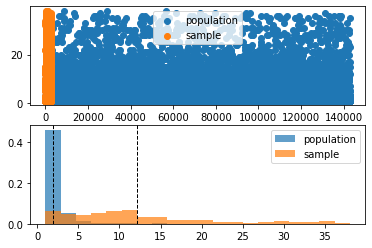

In [128]:
sample= df[df["viewing_country"]=="GB"]["Total_Trend_Days"]
population=df["Total_Trend_Days"]
population, sample= gendata(sample,population)
#look at bootstraping 
#look at assumptions normality

In [129]:
stats.ttest_1samp(sample, population.mean())

Ttest_1sampResult(statistic=61.53144521876544, pvalue=0.0)

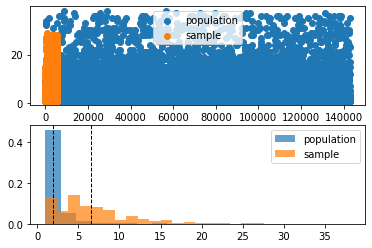

In [130]:
sample= df[df["viewing_country"]=="US"]["Total_Trend_Days"]
population=df["Total_Trend_Days"]
population, sample= gendata(sample,population)

In [131]:
stats.ttest_1samp(sample, population.mean())

Ttest_1sampResult(statistic=75.3408923863122, pvalue=0.0)

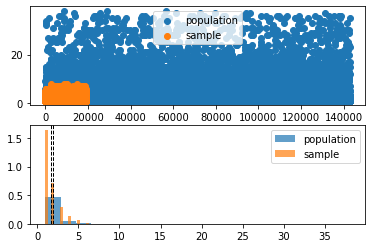

In [132]:
sample= df[df["viewing_country"]=="CA"]["Total_Trend_Days"]
population=df["Total_Trend_Days"]
population, sample= gendata(sample,population)

In [133]:
stats.ttest_1samp(sample, population.mean())

Ttest_1sampResult(statistic=-20.118703762502754, pvalue=4.2301884205135434e-89)